In [26]:
import csv

import networkx as nx
import numpy as np

import feather as ft
import seaborn as sns; sns.set()
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd

from collections import Counter
from operator import itemgetter
from os import listdir
from os.path import isfile, isdir, join, exists
from sklearn.preprocessing import MinMaxScaler

In [27]:
time =199

Set Network Variables

In [28]:
EmailURV = '../../src/datasets/EmailURV/EmailURV.csv'
Emailcontacts = '../../src/datasets/Emailcontacts/Emailcontacts.csv'

G = nx.Graph()
with open(EmailURV, 'r') as file:
    reader = csv.reader(file, delimiter=",")
    for row in reader:
        G.add_edge(int(row[0]), int(row[1]))
N_AGENTS = len(G.nodes())

Set Dataset

In [61]:
mypath = '../../log/'
maindirs = [join(mypath, f) for f in listdir(mypath) if isdir(join(mypath,f)) and "TestingPowerlaw05" in f]
maindirs=maindirs[0]
#dirs = [join(mypath, f) for f in listdir(mypath) if isdir(join(mypath,f)) and ("Graph" in f or "URV" in f)]
dirs = [join(maindirs, f) for f in listdir(maindirs) if isdir(join(maindirs,f))]
dirs

['../../log/TestingPowerlaw05/2019_26_02_11_55_59',
 '../../log/TestingPowerlaw05/2019_26_02_12_27_47',
 '../../log/TestingPowerlaw05/2019_26_02_12_10_53',
 '../../log/TestingPowerlaw05/2019_26_02_11_57_52',
 '../../log/TestingPowerlaw05/2019_26_02_12_33_46',
 '../../log/TestingPowerlaw05/2019_26_02_12_39_44',
 '../../log/TestingPowerlaw05/2019_26_02_12_47_08',
 '../../log/TestingPowerlaw05/2019_26_02_12_26_39',
 '../../log/TestingPowerlaw05/2019_26_02_12_10_05',
 '../../log/TestingPowerlaw05/2019_26_02_11_52_25',
 '../../log/TestingPowerlaw05/2019_26_02_12_01_51',
 '../../log/TestingPowerlaw05/2019_26_02_12_00_55',
 '../../log/TestingPowerlaw05/2019_26_02_11_47_57',
 '../../log/TestingPowerlaw05/2019_26_02_11_47_06',
 '../../log/TestingPowerlaw05/2019_26_02_12_28_40',
 '../../log/TestingPowerlaw05/2019_26_02_11_48_51',
 '../../log/TestingPowerlaw05/2019_26_02_12_07_05',
 '../../log/TestingPowerlaw05/2019_26_02_12_29_35',
 '../../log/TestingPowerlaw05/2019_26_02_12_38_49',
 '../../log/

In [62]:
def which_bin(data, bins):
    try:
        return bins[np.digitize(data, bins)]
    except:
        print("except")
        return bins[-1]
    
bins = np.logspace(-1,2, 21, endpoint=True)

bins

array([  0.1       ,   0.14125375,   0.19952623,   0.28183829,
         0.39810717,   0.56234133,   0.79432823,   1.12201845,
         1.58489319,   2.23872114,   3.16227766,   4.46683592,
         6.30957344,   8.91250938,  12.58925412,  17.7827941 ,
        25.11886432,  35.48133892,  50.11872336,  70.79457844,
       100.        ])

In [63]:
scaler = MinMaxScaler()

In [64]:
dd = dirs[20]

df = pd.DataFrame()
with open(join(dd, 'k_core.csv'), 'r') as file:
    reader = csv.reader(file, delimiter=',')
    for row in reader:
        if len(row) < 5:
            continue
        #try:
        #    int(row[0])
        #except:
        #    continue
        pass
        #print(row)
df = pd.read_csv(join(dd,'k_core.csv'), skiprows=12)
df = df.loc[df['time'] == time]


In [65]:
#df['degree'] = df['degree'].apply(lambda x: which_bin(x,bins))

In [66]:
exportdf = df.loc[df['state'] == 'r'].reset_index()
exportdf = exportdf.drop(columns=['index', 'time', 'agent', 'state'])
exportdf.to_feather('../borge3.feather')
exportdf

,k-core,degree
0,10,30
1,10,23
2,10,38
3,9,22
4,8,10
5,10,21
6,10,26
7,7,8
8,10,17
9,9,32


In [67]:
df = df.loc[df['state'] == 'r']

try:
    df = df.drop(columns=['time', 'agent', 'state'])
except:
    print('no drop')
df = df.sort_values(by=['k-core', 'degree'])
    
count_col = df.groupby(['k-core','degree']).apply(len)

df = df.set_index(['k-core','degree'])
df['count'] = count_col
df['count'] = df['count'].apply(lambda x: x / N_AGENTS)
df = df.drop_duplicates()
df = df.reset_index()
df

,k-core,degree,count
0,1,1,0.006178
1,1,2,0.000883
2,2,2,0.008826
3,2,3,0.001765
4,3,3,0.007061
5,3,4,0.003530
6,4,5,0.004413
7,5,9,0.002648
8,6,6,0.005296


In [58]:
for i in range(len(df)):
    if i == 0 :
        continue
    df.loc[i, "count"] += df.loc[i-1]["count"] 

In [59]:
df

,k-core,degree,count
0,1,1,0.006178
1,1,2,0.007061
2,2,2,0.015887
3,2,3,0.017652
4,3,3,0.024713
5,3,4,0.028244
6,4,5,0.032657
7,5,9,0.035305
8,6,6,0.040600


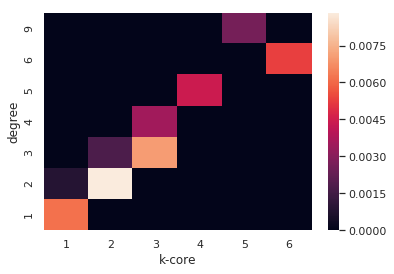

In [68]:
dfpiv = df.pivot("degree", "k-core", "count").fillna(0.)
dfpiv = dfpiv.iloc[::-1]
f, ax = plt.subplots()
sns.heatmap(dfpiv,  linewidths=0, annot=False, ax=ax, 
           #cmap=sns.color_palette("cubehelix", 8)
           )
plt.show()